In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

sns.set(rc={'figure.figsize': (16, 9)})

## A. Dataset

In [2]:
data = pd.read_csv('energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# Перевод в datetime
data.date = pd.to_datetime(data.date)

# Получение weekofyear
data['week'] = data.date.apply(lambda x: x.weekofyear)

# Проверка диапазона недель
print (data.week.min(), data.week.max())

# Отбор данных для нужных недель
data = data[(data.week >= 3) & (data.week <= 20)]

# Изменение индекса
data = data.set_index('date')

# Результат
data.head()

2 21


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-18 00:00:00,60,10,21.823333,39.900000,20.230000,40.0000,20.323333,39.79,21.166667,39.863333,...,38.400000,-2.800000,763.700000,86.0,2.0,25.0,-4.900000,2.995012,2.995012,3
2016-01-18 00:10:00,50,10,21.790000,39.933333,20.166667,40.0900,20.390000,39.79,21.100000,39.826667,...,38.466667,-2.883333,763.583333,86.0,2.0,25.5,-4.983333,7.407794,7.407794,3
2016-01-18 00:20:00,40,10,21.730000,40.000000,20.075000,40.0675,20.323333,39.79,21.100000,39.900000,...,38.400000,-2.966667,763.466667,86.0,2.0,26.0,-5.066667,3.649394,3.649394,3
2016-01-18 00:30:00,30,20,21.666667,40.000000,20.000000,40.0000,20.290000,39.70,21.100000,39.933333,...,38.466667,-3.050000,763.350000,86.0,2.0,26.5,-5.150000,2.144295,2.144295,3
2016-01-18 00:40:00,40,0,21.600000,40.193333,19.945000,40.0000,20.260000,39.76,21.100000,40.000000,...,38.590000,-3.133333,763.233333,86.0,2.0,27.0,-5.233333,26.123064,26.123064,3


In [4]:
# Делаем все колонки float
data = data.astype(float)

# Результат
data.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64')], dtype=object)

In [5]:
# Разделяем признаки и целевую переменную
X, y = data.iloc[:, 1:], data.iloc[:, 0]

X.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-18 00:00:00,10.0,21.823333,39.900000,20.230000,40.0000,20.323333,39.79,21.166667,39.863333,19.50,...,38.400000,-2.800000,763.700000,86.0,2.0,25.0,-4.900000,2.995012,2.995012,3.0
2016-01-18 00:10:00,10.0,21.790000,39.933333,20.166667,40.0900,20.390000,39.79,21.100000,39.826667,19.39,...,38.466667,-2.883333,763.583333,86.0,2.0,25.5,-4.983333,7.407794,7.407794,3.0
2016-01-18 00:20:00,10.0,21.730000,40.000000,20.075000,40.0675,20.323333,39.79,21.100000,39.900000,19.39,...,38.400000,-2.966667,763.466667,86.0,2.0,26.0,-5.066667,3.649394,3.649394,3.0
2016-01-18 00:30:00,20.0,21.666667,40.000000,20.000000,40.0000,20.290000,39.70,21.100000,39.933333,19.29,...,38.466667,-3.050000,763.350000,86.0,2.0,26.5,-5.150000,2.144295,2.144295,3.0
2016-01-18 00:40:00,0.0,21.600000,40.193333,19.945000,40.0000,20.260000,39.76,21.100000,40.000000,19.29,...,38.590000,-3.133333,763.233333,86.0,2.0,27.0,-5.233333,26.123064,26.123064,3.0


### Визуализация

In [6]:
# Проверка отсортированности
data.index.is_monotonic

True

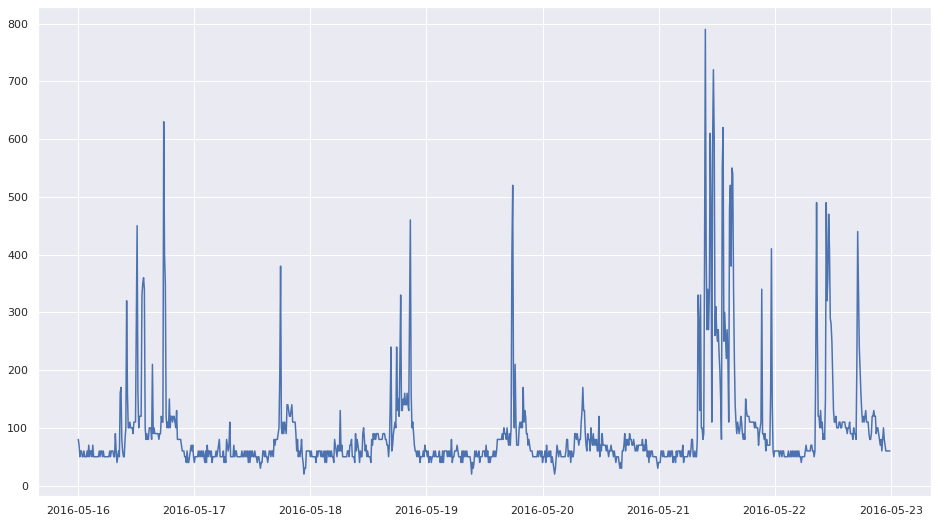

In [7]:
mask = X.week == X.week.max()

plt.plot(y.index[mask], y[mask])

## B. Validation. Alternative

Ответ на вопрос о типе валидации: *Валидация по отложенной выборке*

In [8]:
class CustomSplitter:
    def __init__(self, n_splits, col_name: str, first: float, step: float):
        self.n_splits = n_splits
        self.col_name = col_name
        self.first = first
        self.step = step
        
        
    def get_n_splits(self, X=None, y=None):
        return self.n_splits
        
        
    def split(self, X, y=None):
        vals = np.array(X[self.col_name])
        
        for i in range(self.n_splits):
            yield np.where(vals < self.first + i * self.step)[0], \
                    np.where((self.first + i * self.step <= vals) & \
                             (vals < self.first + (i + 1) * self.step))[0]

In [9]:
cv = CustomSplitter(5, 'week', 11, 2)

## C. Feature Extraction

#### Отличие leaf-wise от depth-wise: 

Если коротко - они отличаются шагом алгоритма:

Depth-wise деревья строят весь уровень целиком, разбивая каждый нетерминальный узел.
Leaf-wise деревья ищут узел, который дает наибольший прирост качества и разбивают только его.

#### Подсчет feature importances:

В catboost есть несколько методов подсчета feature importance. Я воспользовался оценкой изменения функции потерь (она считается приблизительно, заменяя значение функции потерь в листе, на пути к которому было разбиение по фиче, на матожидание функции потерь на элементах в листе в модели, из которой фича была "удалена")

#### Количество листьев

По идее, $2^D$. Однако мне казалось, что терминальные узлы уже не делятся, так что я бы сказал $L \leq 2^D$.

In [10]:
from catboost import CatBoostRegressor

models = [CatBoostRegressor(n_estimators=200, depth=4, \
                            has_time=True, logging_level='Silent') for i in range(5)]

In [11]:
imps = []

for model, (train_ind, test_ind) in zip(models, cv.split(X)):
    X_train, X_test = X.iloc[train_ind], X.iloc[test_ind]
    y_train, y_test = y.iloc[train_ind], y.iloc[test_ind]
    
    model.fit(X_train, y_train)
    model.predict(X_test)
    imps.append(model.get_feature_importance())

In [12]:
imps = np.array(imps)

cv_mean = imps.mean(axis=0)
cv_std = imps.std(axis=0, ddof=1)

Text(0.5, 1.0, 'Feature importance')

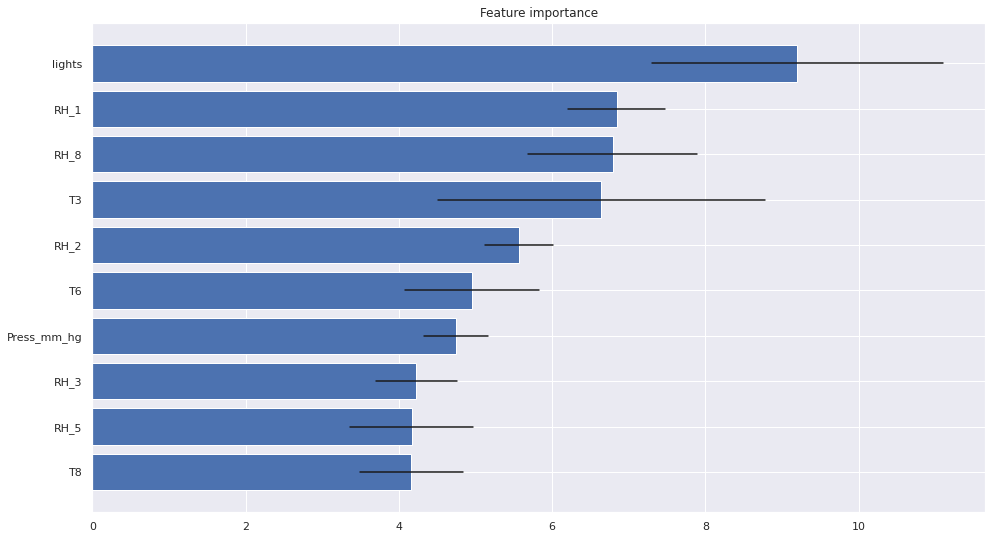

In [13]:
ids = np.argsort(cv_mean)[-10:]

plt.barh(X.columns[ids], cv_mean[ids])

for i, name in enumerate(X.columns[ids]):
    delta = [cv_mean[ids][i] - cv_std[ids][i], cv_mean[ids][i] + cv_std[ids][i]]
    plt.plot(delta, (name, name), 'k')
plt.title('Feature importance')

In [14]:
leaf_inds_matrices = []

for i, (train, test) in enumerate(cv.split(X)):
    model = models[i]
    
    leaf_inds_before = model.calc_leaf_indexes(X.iloc[np.hstack([train, test])])
    
    # Перевод в новое признаковое пространство
    L = 16  # L = 2^D = 2^4

    leaf_inds_after = leaf_inds_before + np.arange(0, 200) * L  # Надеюсь это считается за векторную алгебру
    leaf_inds_matrices.append(leaf_inds_after)
    
    print(f'\nФолд #{i}:\n')
    print(f'Старая матрица индексов:\n{leaf_inds_before[:10, :10]}')
    print(f'\nНовая матрица индексов:\n{leaf_inds_after[:10, :10]}')
    print(f'\nРазмерность до: {leaf_inds_before.shape}, размерность после: {leaf_inds_after.shape}')
    #  L = 16, N * L = 3200


Фолд #0:

Старая матрица индексов:
[[11 13 14 15 11  0 12  5  4 12]
 [11 13 14 15 11  0 12  5  4 12]
 [11 13 14 15 11  0 12  5  4 12]
 [11 13 15 15 11  0 13  5  4 13]
 [10 12 14 14 10  0 12  7  4 12]
 [10 12 14 14 10  0 12  7  4 12]
 [10 12 14 14 10  0 12  7  4 12]
 [10 12 14 14 10  0 12  7  4 12]
 [11 13 14 15 11  0 12  7  4 12]
 [10 12 14 14 10  0 12  3  4 12]]

Новая матрица индексов:
[[ 11  29  46  63  75  80 108 117 132 156]
 [ 11  29  46  63  75  80 108 117 132 156]
 [ 11  29  46  63  75  80 108 117 132 156]
 [ 11  29  47  63  75  80 109 117 132 157]
 [ 10  28  46  62  74  80 108 119 132 156]
 [ 10  28  46  62  74  80 108 119 132 156]
 [ 10  28  46  62  74  80 108 119 132 156]
 [ 10  28  46  62  74  80 108 119 132 156]
 [ 11  29  46  63  75  80 108 119 132 156]
 [ 10  28  46  62  74  80 108 115 132 156]]

Размерность до: (10080, 200), размерность после: (10080, 200)

Фолд #1:

Старая матрица индексов:
[[11 11 14  6 12  6  1 11 10 12]
 [11 11 14  6 12  6  1 11 10 12]
 [11 11 14  

### OHE

In [15]:
ohes = []
for i in range(5):
    ohe = np.zeros(shape=(leaf_inds_matrices[i].shape[0], 3200))
    for j, row in enumerate(leaf_inds_matrices[i]):
        ohe[j, row] = 1

    ohes.append(ohe)

## D. Linear Regression

In [16]:
from sklearn.linear_model import Lasso

Разница между L1 и L2 регуляризациями заключается в норме вектора весов: соответственно L1-норма и L2-норма. Грубо говоря, дело в том, что L1-регуляризация оценивает веса всех признаков как равноценные, и поэтому уменьшает веса перед наименее значимыми фичами, а L2-регуляризатору гораздо выгоднее уменьшить большой вес, чем маленький. Поэтому даже если вес фич подходит к нулю, он не вырождается, потому что всегда находится достаточно большой вес, уменьшение которого оказывается выгоднее, чем уменьшение маленького, пусть и почти бесполезного

Фолд #0:

Занулились веса у     95.53125% признаков



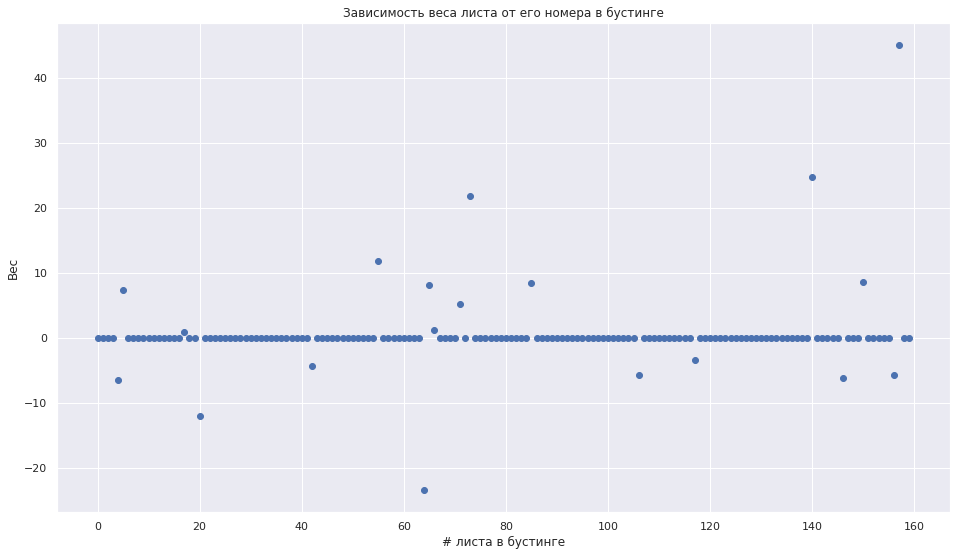

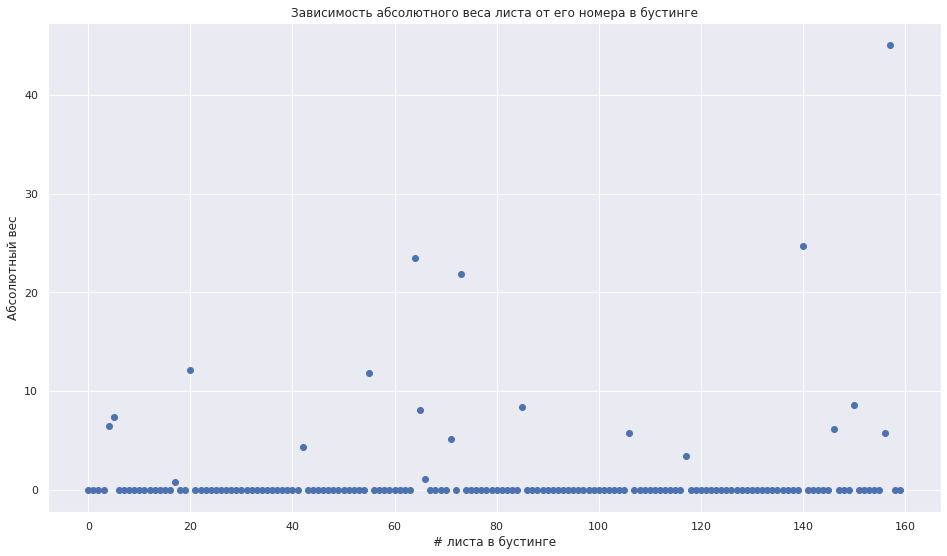

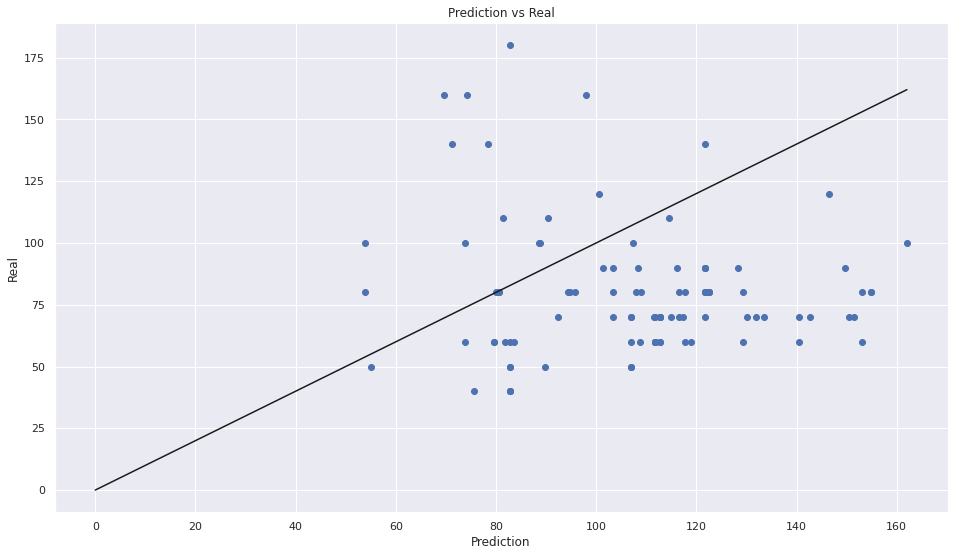

Фолд #1:

Занулились веса у     94.96875% признаков



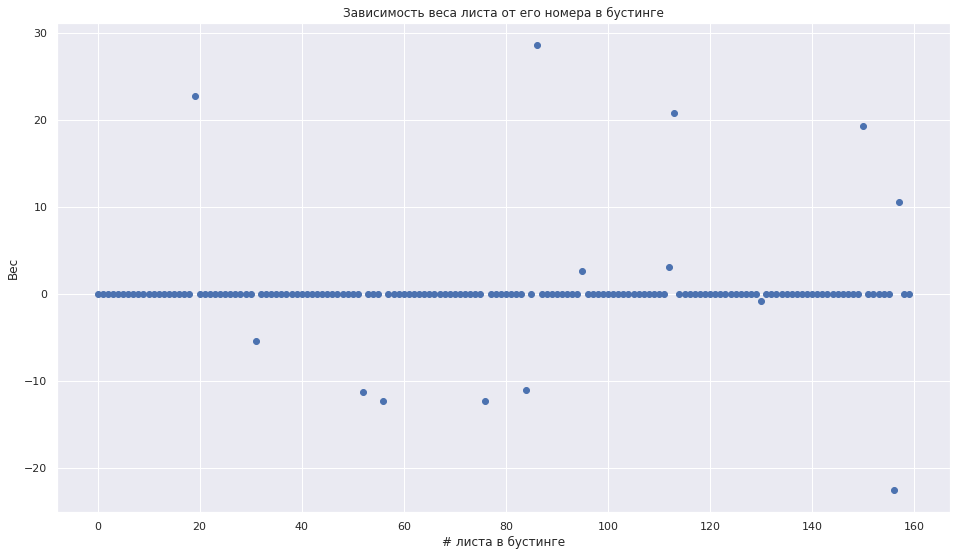

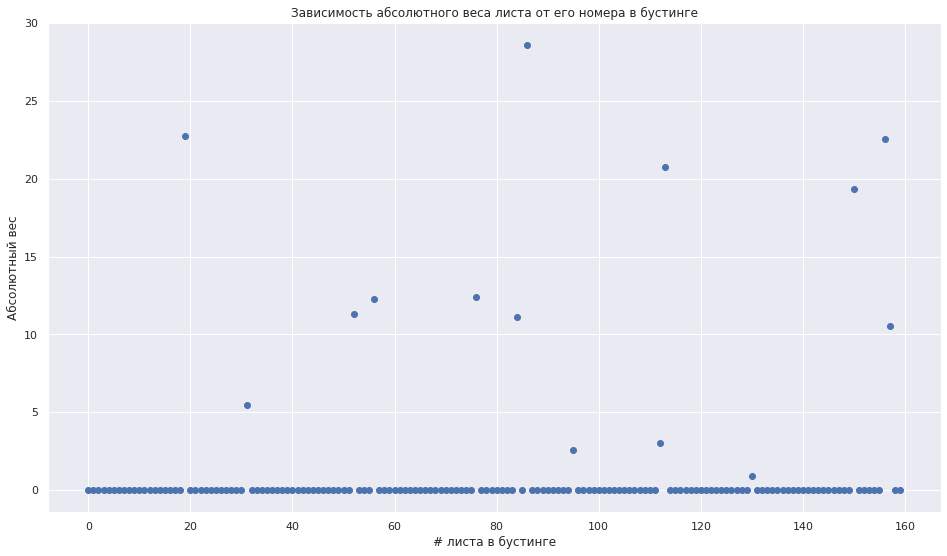

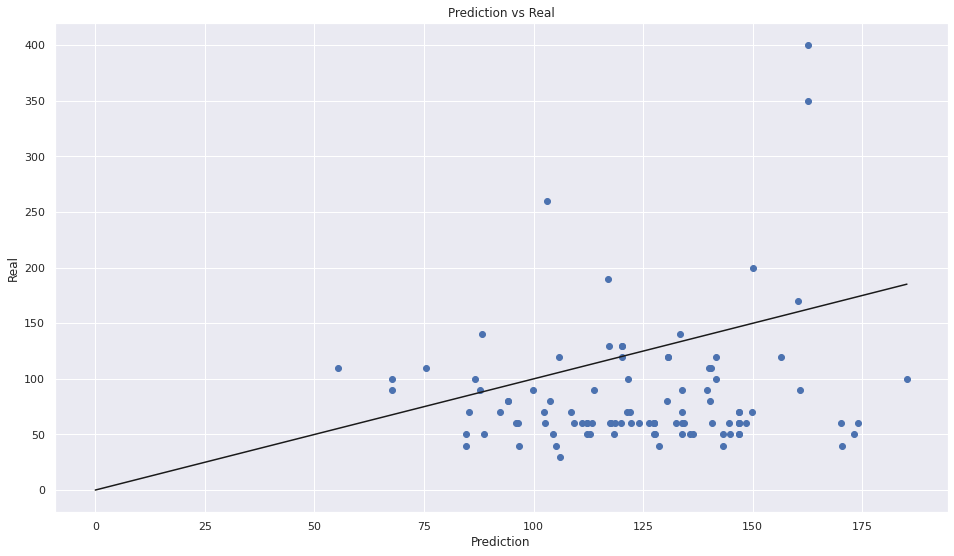

Фолд #2:

Занулились веса у     95.3125% признаков



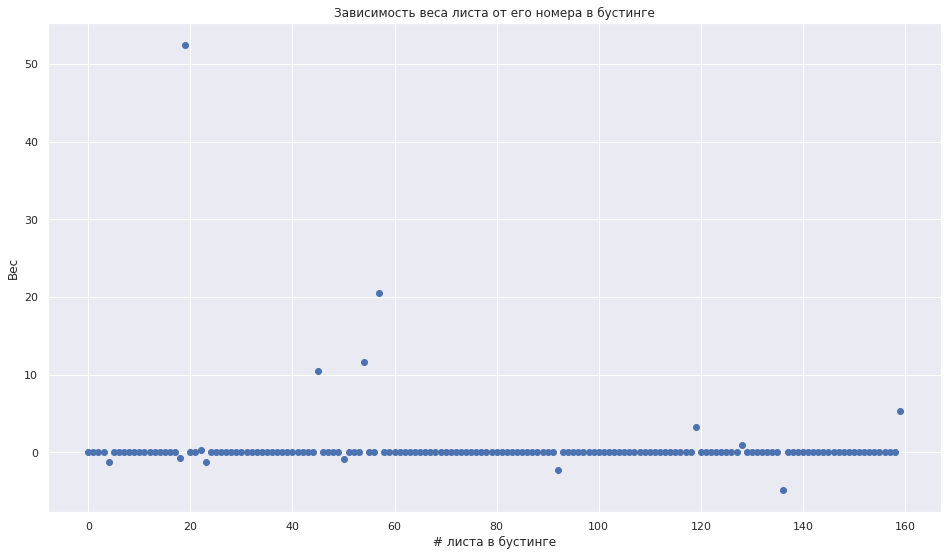

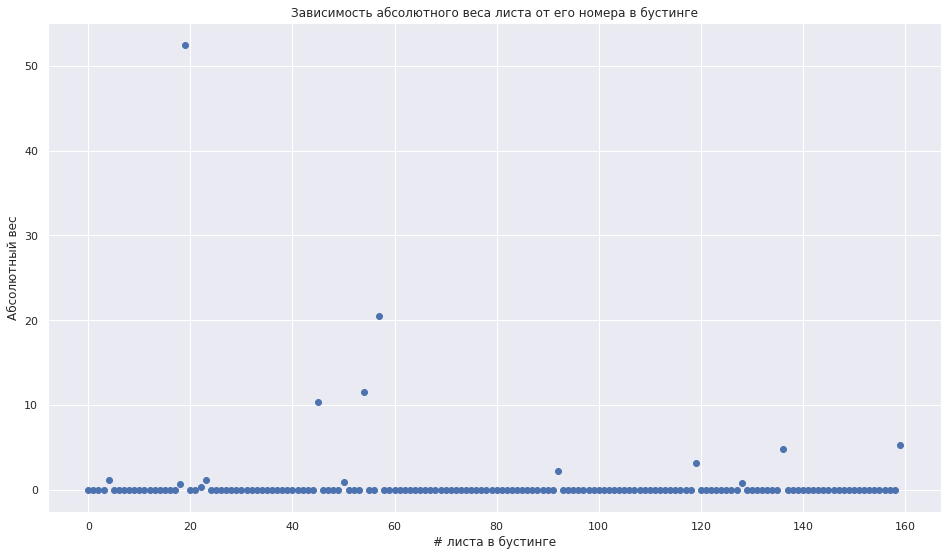

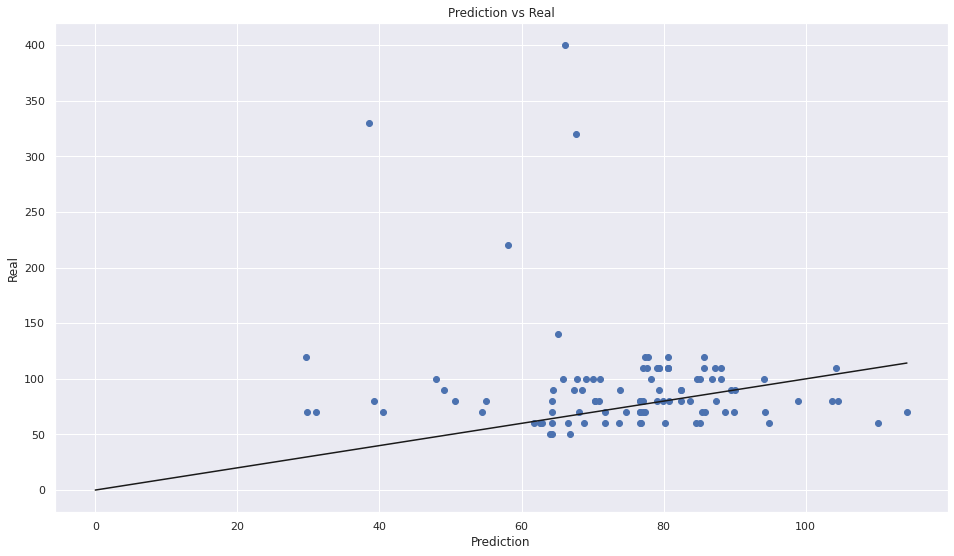

Фолд #3:

Занулились веса у     95.21875% признаков



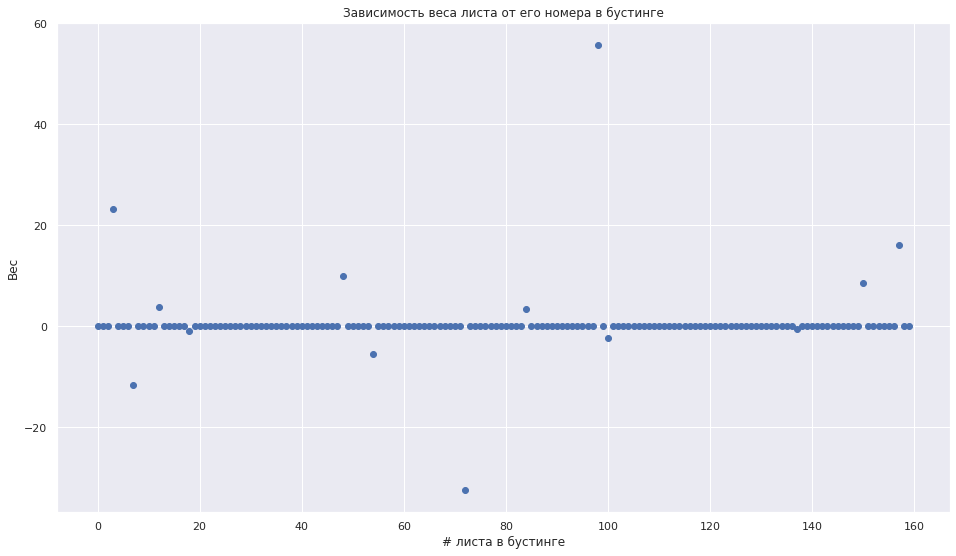

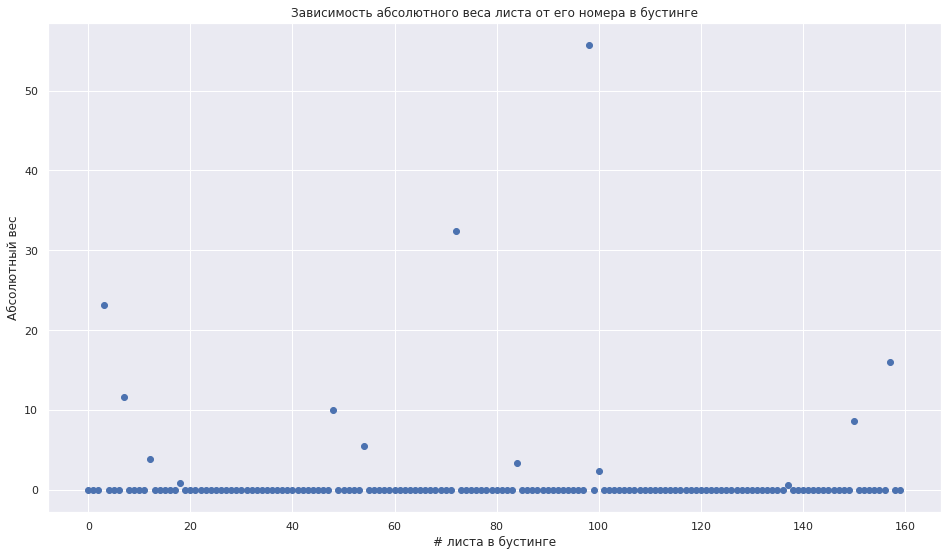

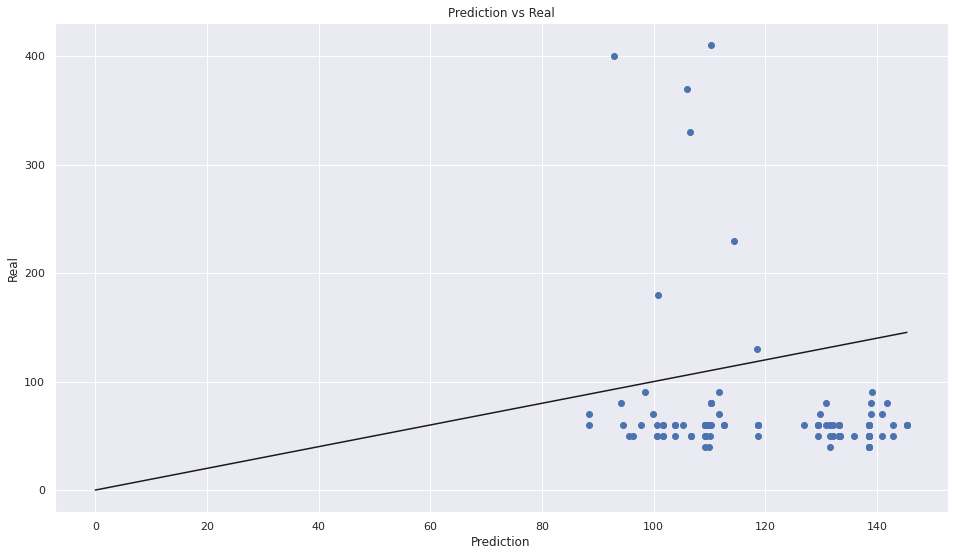

Фолд #4:

Занулились веса у     95.65625% признаков



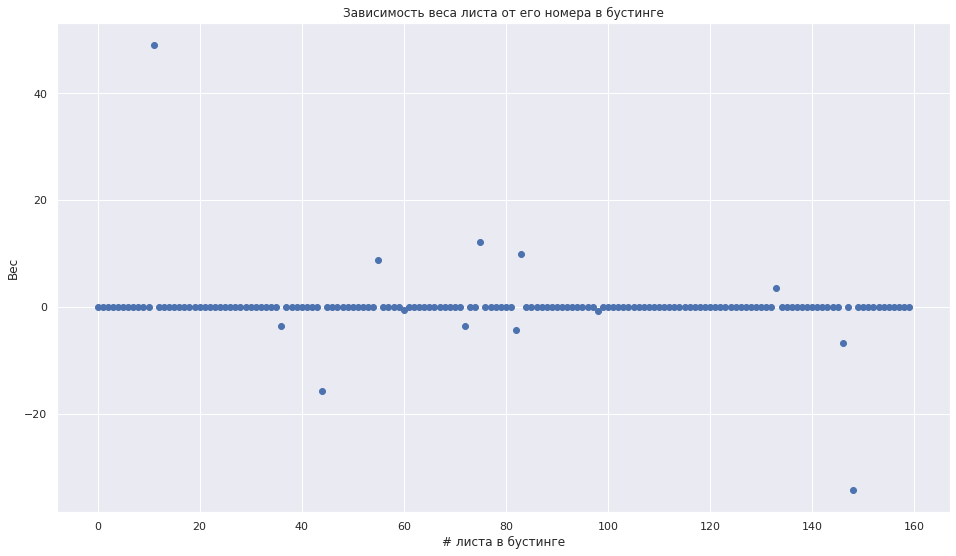

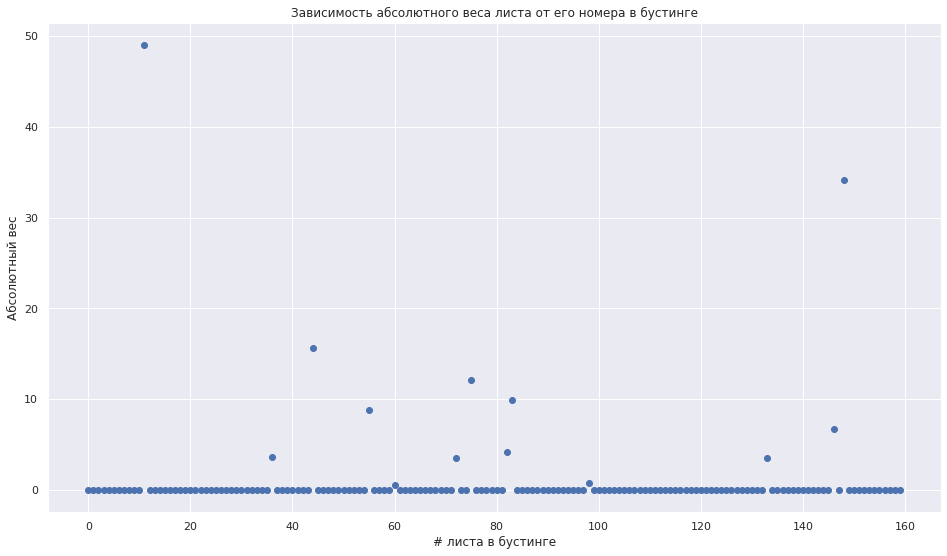

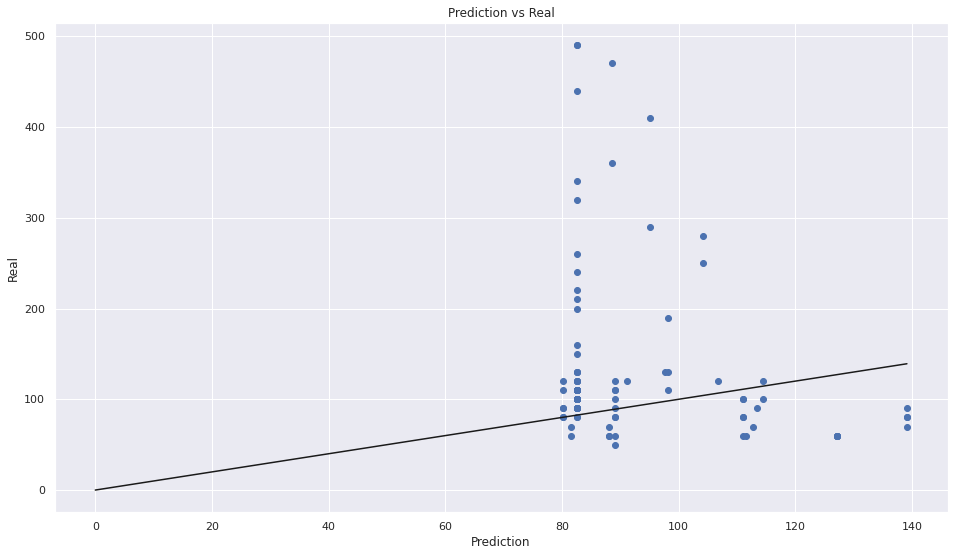

In [17]:
lassoes = [Lasso(alpha=0.666) for i in range(5)]

for i, (train, test) in enumerate(cv.split(X)):
    ohe = ohes[i]
    
    model = lassoes[i]
    model.fit(ohe[train], y[train])
    print(f'Фолд #{i}:\n\nЗанулились веса у \
    {(model.coef_ == 0).sum() / ohe.shape[1] * 100}% признаков\n')
    
    # Я, к сожалению, так и не понял, что за scatterplot нужно было построить
    plt.scatter([j for j in range(10*L)], model.coef_[:10*L])
    plt.xlabel('# листа в бустинге')
    plt.ylabel('Вес')
    plt.title('Зависимость веса листа от его номера в бустинге')
    plt.show()
    
    plt.scatter([j for j in range(10*L)], np.abs(model.coef_[:10*L]))
    plt.xlabel('# листа в бустинге')
    plt.ylabel('Абсолютный вес')
    plt.title('Зависимость абсолютного веса листа от его номера в бустинге')
    plt.show()
    
    plt.scatter(model.predict(ohe[test][-100:]), y[test][-100:])
    z = model.predict(ohe[test][-100:]).max()
    
    plt.plot([0, z], [0, z], 'k')
    
    plt.xlabel('Prediction')
    plt.ylabel('Real')
    plt.title('Prediction vs Real')
    
    plt.show()

### Confidence bound

In [18]:
from scipy.stats import norm

За нижнюю и верхнюю границы 95% доверительного интервала отвечают любые две квантили a и b, такие что:

$$ P(a < x < b) = 0.95 $$

Обычно берут квантили уровня 0.025 и 0.975

Фолд #0

Реальное значение попадает в область доверительной трубки в             52.083333333333336% случаев


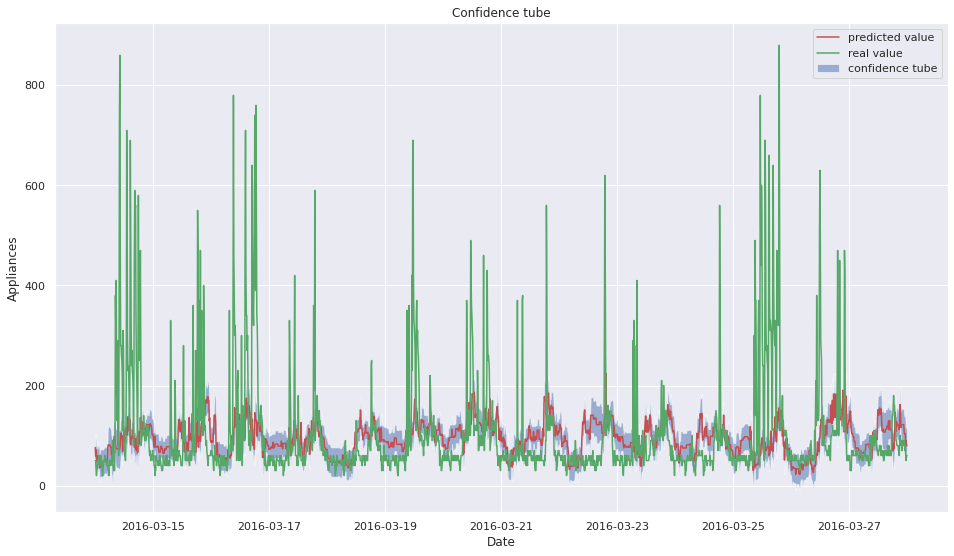

Фолд #1

Реальное значение попадает в область доверительной трубки в             42.90674603174603% случаев


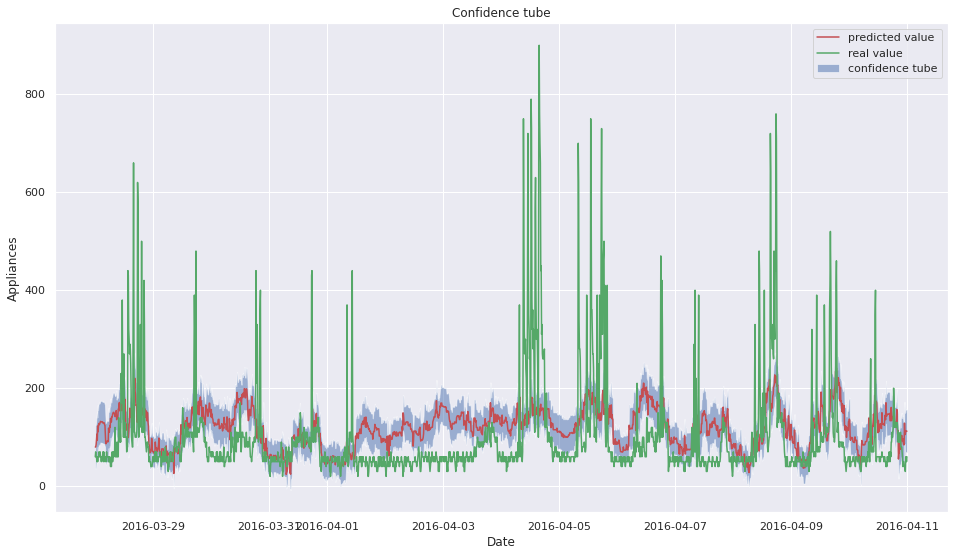

Фолд #2

Реальное значение попадает в область доверительной трубки в             45.43650793650794% случаев


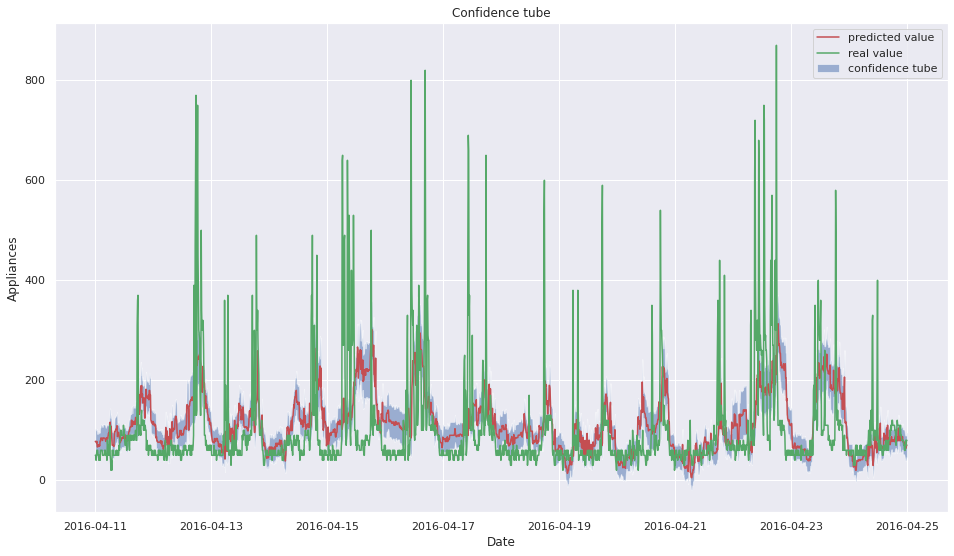

Фолд #3

Реальное значение попадает в область доверительной трубки в             48.80952380952381% случаев


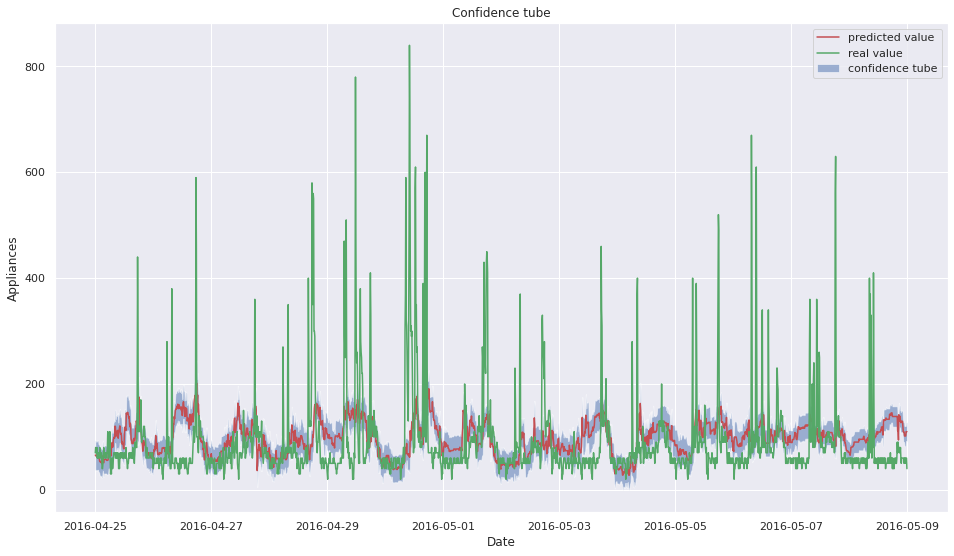

Фолд #4

Реальное значение попадает в область доверительной трубки в             28.075396825396826% случаев


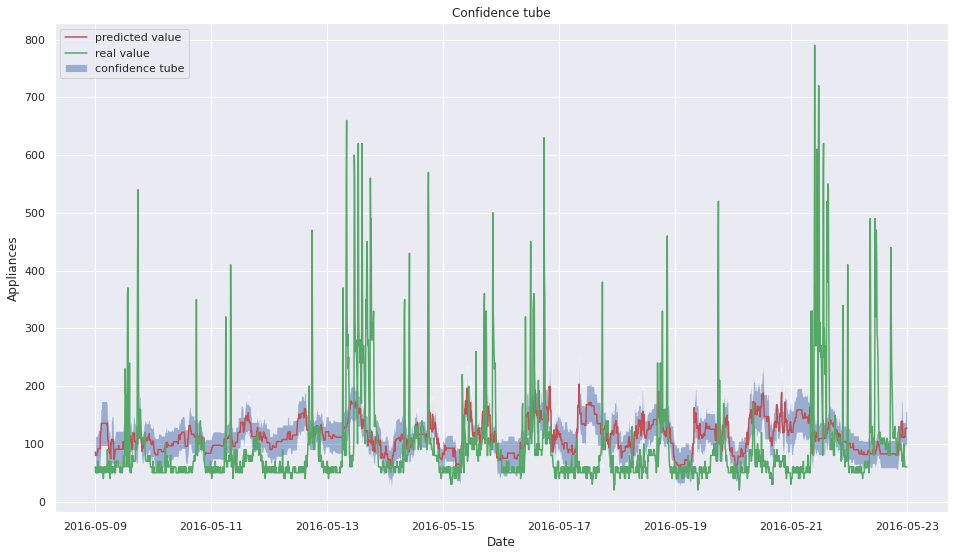

In [19]:
noise = norm(loc=1, scale=np.sqrt(0.2))

for i, (train, test) in enumerate(cv.split(X)):
    ohe = ohes[i]
    noise_matrix = noise.rvs(size=(10000, 3200))  # генерируем нужное количество шумовых коэффициентов
    
    pred = lassoes[i].predict(ohe[test])  # предсказание обученной модели
    coefs = lassoes[i].coef_.copy()  # матрица коэффициентов зашумленных моделей
    res_matrix = np.zeros(shape=(10000, test.size))  # матрица предсказаний моделей
    
    # Получаем предсказания каждой модели для тестовой выборки
    for j, row in enumerate(noise_matrix):
        lassoes[i].coef_ = coefs * row
        res_matrix[j] = lassoes[i].predict(ohe[test])
    
    # Отбираем значения квантилей предсказаний по каждому объекту
    lcb, ucb = np.apply_along_axis(lambda col: col[np.argsort(col)][np.array([250, 9749])], \
                                   axis=0, arr=res_matrix)
    print(f'Фолд #{i}\n')

    print(f'Реальное значение попадает в область доверительной трубки в \
            {((y[test] < ucb).values & (y_test > lcb).values).sum() / y[test].size * 100}% случаев')
    
    plt.fill_between(y[test].index, lcb, ucb, alpha=0.5, label='confidence tube')
    plt.plot(y[test].index, pred, 'r', label='predicted value')
    plt.plot(y[test].index, y[test], 'g', label='real value')
    plt.title('Confidence tube')
    plt.xlabel('Date')
    plt.ylabel('Appliances')
    plt.legend()
    plt.show()

del noise_matrix, res_matrix

### Quantile Regression

In [20]:
import sklearn
sklearn.__version__

'1.0.dev0'

In [21]:
from sklearn.linear_model import QuantileRegressor

In [22]:
qr_lcb = QuantileRegressor(quantile=0.025, alpha=0.001, solver='highs-ds')
qr_ucb = QuantileRegressor(quantile=0.975, alpha=0.001, solver='highs-ds')
qr_med = QuantileRegressor(quantile=0.5, alpha=0.001, solver='highs-ds')

Фолд #0

Реальное значение попадает в область доверительной трубки в             79.46428571428571% случаев


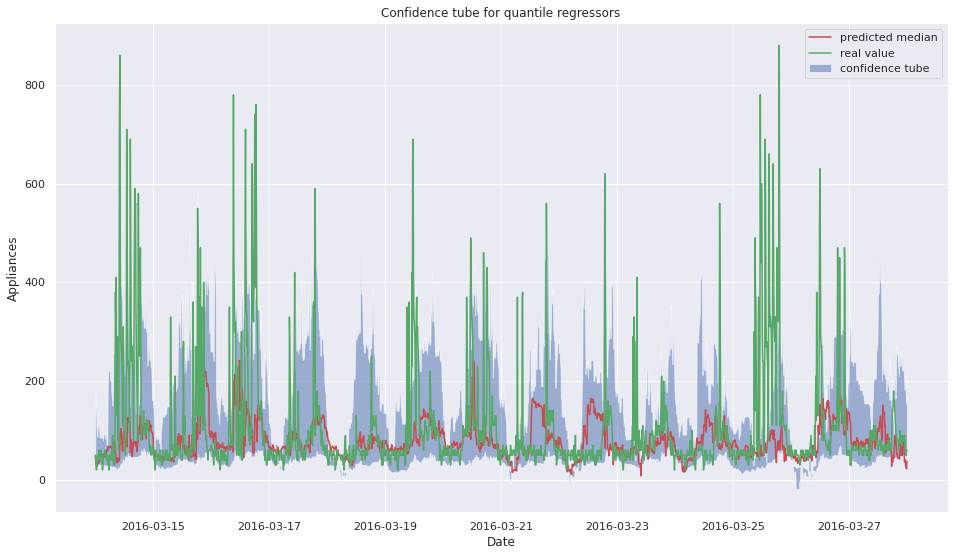

Фолд #1

Реальное значение попадает в область доверительной трубки в             91.66666666666666% случаев


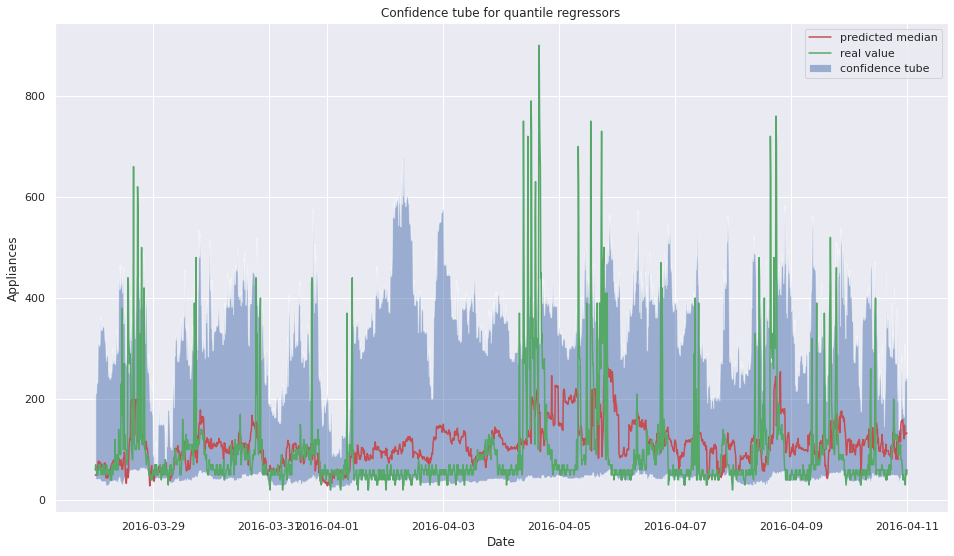

Фолд #2

Реальное значение попадает в область доверительной трубки в             78.3234126984127% случаев


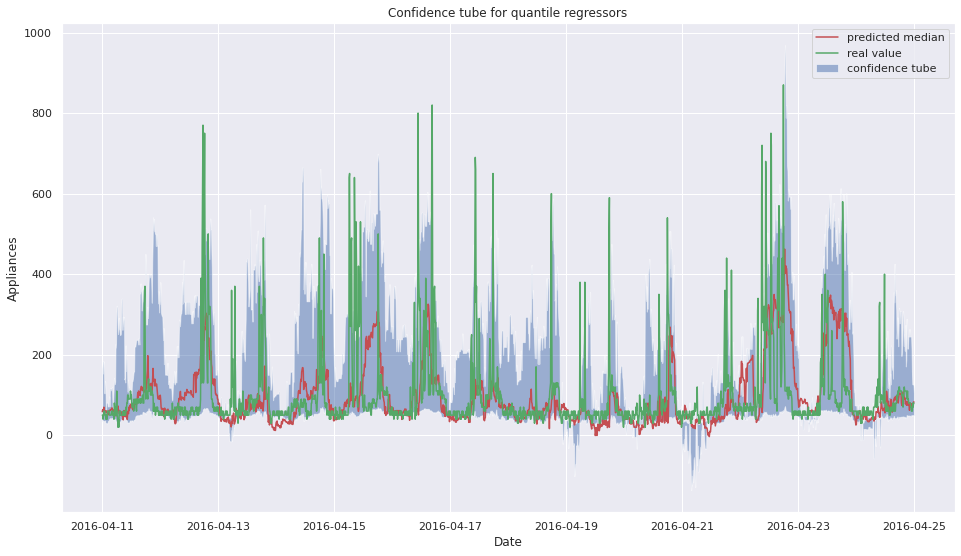

Фолд #3

Реальное значение попадает в область доверительной трубки в             90.625% случаев


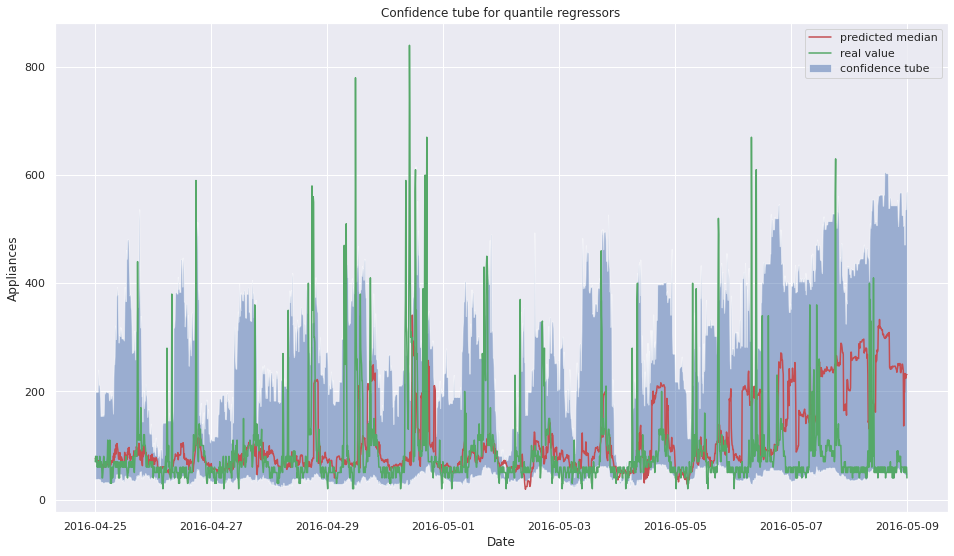

Фолд #4

Реальное значение попадает в область доверительной трубки в             86.80555555555556% случаев


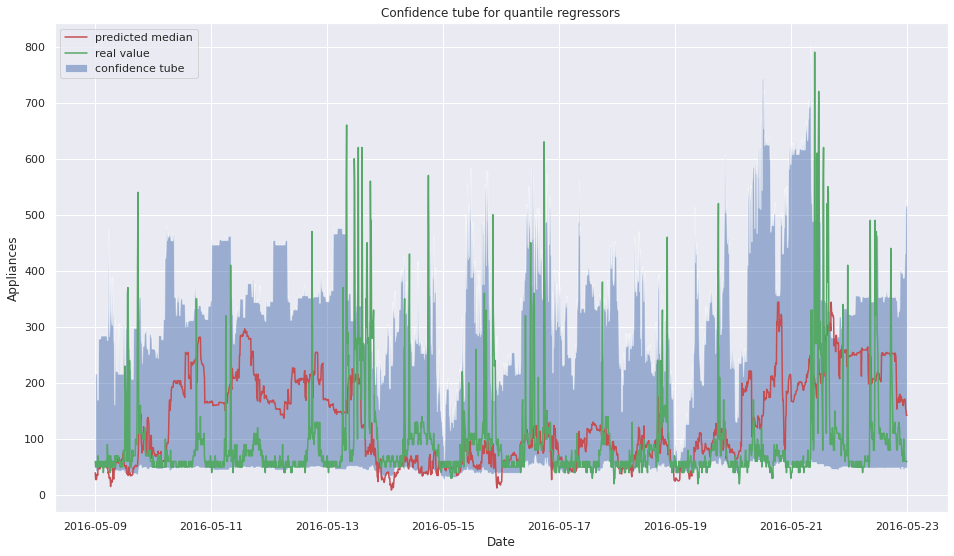

In [23]:
for i, (train, test) in enumerate(cv.split(X)):
        
    ohe = ohes[i]
    ohe_mask = ohe.any(axis=0) # Урезал ohe, не хватает оперативки, удалил нулевые столбцы
    
    # также пришлось урезать train, брал последние 5000 элементов
    qr_lcb.fit(ohe[:, ohe_mask][train][-5000:], y[train][-5000:])
    qr_ucb.fit(ohe[:, ohe_mask][train][-5000:], y[train][-5000:])
    qr_med.fit(ohe[:, ohe_mask][train][-5000:], y[train][-5000:])
    
    lcb = qr_lcb.predict(ohe[:, ohe_mask][test])
    ucb = qr_ucb.predict(ohe[:, ohe_mask][test])
    pred = qr_med.predict(ohe[:, ohe_mask][test])
    
    print(f'Фолд #{i}\n')
    print(f'Реальное значение попадает в область доверительной трубки в \
            {((y[test] < ucb).values & (y_test > lcb).values).sum() / y[test].size * 100}% случаев')
    
    plt.fill_between(y[test].index, lcb, ucb, alpha=0.5, label='confidence tube')
    plt.plot(y[test].index, pred, 'r', label='predicted median')
    plt.plot(y[test].index, y[test], 'g', label='real value')
    plt.title('Confidence tube for quantile regressors')
    plt.xlabel('Date')
    plt.ylabel('Appliances')
    plt.legend()
    plt.show()